In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats import anova
from statsmodels.stats import outliers_influence

In [4]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'HousingData.csv'
X = pd.read_csv(fname)

In [5]:
X = X.dropna(axis = 0, how = 'any')
X = X.reset_index(drop = True)
Nrow, Ncol = X.shape

#### First try simple linear regression, using LSTAT as the predictor for MEDV  
The methods available for the regression results can be found with [RegressionResults](http://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) and [OLSResults](http://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults)

In [6]:
xx = X.LSTAT.copy()
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.MEDV.copy()
model1 = sm.OLS(yy, xx)
results1 = model1.fit()

In [7]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     484.4
Date:                Mon, 30 Jul 2018   Prob (F-statistic):           1.77e-70
Time:                        21:08:21   Log-Likelihood:                -1272.0
No. Observations:                 394   AIC:                             2548.
Df Residuals:                     392   BIC:                             2556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2358      0.622     55.082      0.000      33.014      35.458
LSTAT         -0.9301      0.042    -22.009      0.000      -1.013      -0.847
==============================================================================
Omnibus:                      118.775   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.397
Skew:                           1.551   Prob(JB):                     1.42e-58
Kurtosis:                       5.571   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 432x288 with 0 Axes>

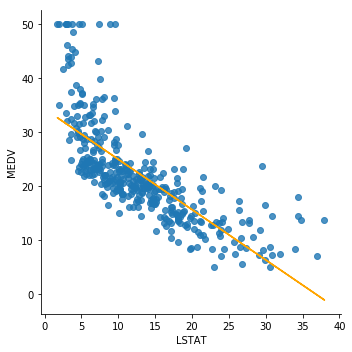

In [8]:
# visualize the linear fit on the training data
plt.figure()
sns.lmplot(x = 'LSTAT', y = 'MEDV', data=X, fit_reg=False)
plt.plot(X.LSTAT, results1.predict(xx), 'orange')

In [9]:
# predict MEDV with testing data
xnew = pd.DataFrame([5, 10, 15], columns=['LSTAT'])
xnew = sm.add_constant(xnew)
results1.predict(xnew)

0    29.585454
1    24.935110
2    20.284765
dtype: float64

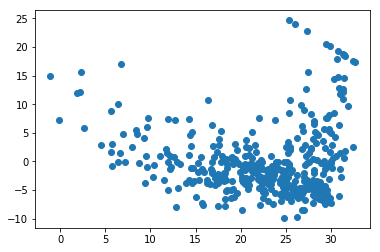

In [10]:
residuals = results1.resid
# residual plot
plt.scatter(results1.predict(xx), residuals)

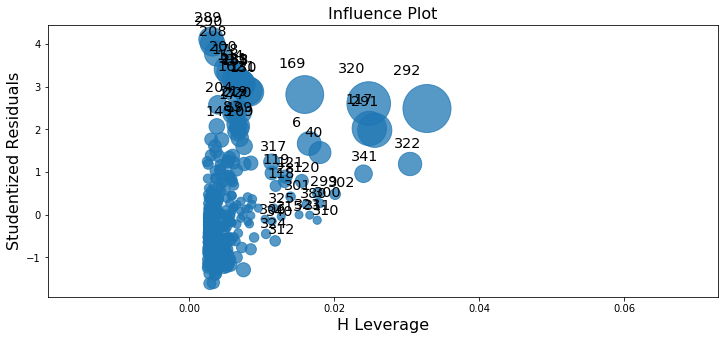

In [11]:
fig, ax = plt.subplots(figsize = (12, 5))
fig = sm.graphics.influence_plot(results1, ax = ax)

In [12]:
infl = results1.get_influence()

In [13]:
resd_std = infl.resid_studentized_internal
# which observations are possible outliers?
irows = np.nonzero(abs(resd_std) > 3)
print('Studentized residual > 3: ', irows)

Studentized residual > 3:  (array([134, 155, 163, 178, 200, 208, 221, 288, 289, 290]),)


In [14]:
hatDiag = infl.hat_diag_factor
# which observations are high leverage points?
hi0 = 2 / Nrow # p = 1, n = Nrow
irows = np.nonzero(hatDiag > hi0)
print('Leverage > ', hi0, ': ', irows)

Leverage >  0.005076142131979695 :  (array([  0,   2,   3,   4,   6,   7,  16,  26,  28,  30,  33,  34,  35,
        40,  43,  45,  47,  55,  67,  74,  82,  83, 116, 117, 118, 119,
       120, 121, 122, 129, 130, 131, 134, 141, 144, 147, 151, 152, 153,
       154, 155, 158, 159, 161, 162, 163, 165, 166, 169, 174, 177, 178,
       181, 182, 185, 188, 195, 196, 197, 199, 200, 209, 214, 215, 218,
       219, 220, 221, 226, 227, 231, 232, 237, 253, 267, 274, 276, 285,
       288, 291, 292, 293, 294, 295, 297, 298, 299, 300, 301, 302, 303,
       306, 310, 311, 312, 313, 315, 316, 317, 319, 320, 321, 322, 323,
       324, 325, 326, 327, 332, 333, 338, 340, 341, 342, 344, 345, 360,
       367, 369, 379, 380, 386]),)


#### Add x^2 term to account for non-linearity

In [15]:
xx = X.LSTAT.copy()
xx2 = pd.DataFrame(xx.values ** 2, columns = ['LSTAT2'])
xx = pd.concat([xx, xx2], axis = 1)
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.MEDV.copy()
results2 = sm.OLS(yy, xx).fit()

In [16]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     357.1
Date:                Mon, 30 Jul 2018   Prob (F-statistic):           6.00e-89
Time:                        21:08:22   Log-Likelihood:                -1225.8
No. Observations:                 394   AIC:                             2458.
Df Residuals:                     391   BIC:                             2469.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3158      0.969     43.689      0.000      40.412      44.220
LSTAT         -2.2567      0.136    -16.615      0.000      -2.524      -1.990
LSTAT2         0.0410      0.004     10.165      0.000       0.033       0.049
==============================================================================
Omnibus:                       98.572   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.522
Skew:                           1.247   Prob(JB):                     3.22e-51
Kurtosis:                       5.818   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
anova.anova_lm(results1, results2)

/Users/pinqingkan/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,392.0,14694.339176,0.0,NaN,NaN,NaN
1,391.0,11622.633650,1.0,3071.705525,103.336034,1.072942e-21


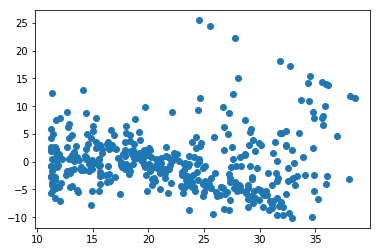

In [18]:
residuals = results2.resid
# residual plot
plt.scatter(results2.predict(xx), residuals)

#### use polynomial fit to explore different polynomial orders

Text(0.5,1,'R squared')

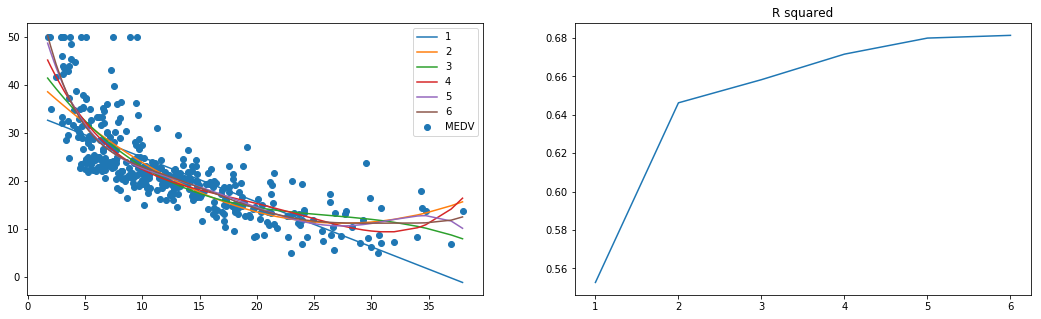

In [19]:
ind = np.argsort(X.LSTAT)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 5))
ax1.scatter(X.LSTAT, X.MEDV)
iformula = 'MEDV ~ 1'
Rsquared = []
for i in range(1, 7):
    iformula += ' + np.power(LSTAT, ' + str(i) + ')'
    results = sm.OLS.from_formula(formula = iformula, data = X).fit()
    y2 = results.fittedvalues
    Rsquared.append(results.rsquared)
    ax1.plot(X.LSTAT[ind], y2[ind], label = str(i))
ax1.legend()
ax2.plot(np.arange(1, 7), Rsquared)
ax2.set_title('R squared')

#### Then try multiple linear regression

In [20]:
xx = X.drop(['MEDV'], axis = 1)
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.MEDV.copy()
results0 = sm.OLS(yy, xx).fit()

In [21]:
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     96.29
Date:                Mon, 30 Jul 2018   Prob (F-statistic):          1.75e-111
Time:                        21:08:22   Log-Likelihood:                -1143.4
No. Observations:                 394   AIC:                             2315.
Df Residuals:                     380   BIC:                             2370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6801      5.681      5.752      0.000      21.509      43.851
CRIM          -0.0976      0.032     -3.007      0.003      -0.161      -0.034
ZN             0.0489      0.014      3.397      0.001       0.021       0.077
INDUS          0.0304      0.066      0.461      0.645      -0.099       0.160
CHAS           2.7694      0.925      2.993      0.003       0.950       4.588
NOX          -17.9690      4.243     -4.235      0.000     -26.311      -9.627
RM             4.2833      0.471      9.100      0.000       3.358       5.209
AGE           -0.0130      0.014     -0.898      0.370      -0.041       0.015
DIS           -1.4585      0.211     -6.912      0.000      -1.873      -1.044
RAD            0.2859      0.069      4.125      0.000       0.150       0.422
TAX           -0.0131      0.004     -3.324      0.001      -0.021      -0.005
PTRATIO       -0.9146      0.141     -6.506      0.000      -1.191      -0.638
B              0.0097      0.003      3.251      0.001       0.004       0.015
LSTAT         -0.4237      0.055     -7.700      0.000      -0.532      -0.315
==============================================================================
Omnibus:                      161.243   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.814
Skew:                           1.657   Prob(JB):                    3.33e-197
Kurtosis:                       9.643   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
VIF = []
for i in range(len(xx.columns)):
    if i == 0: continue # skip the intercept
    VIF.append(outliers_influence.variance_inflation_factor(xx.values, i))

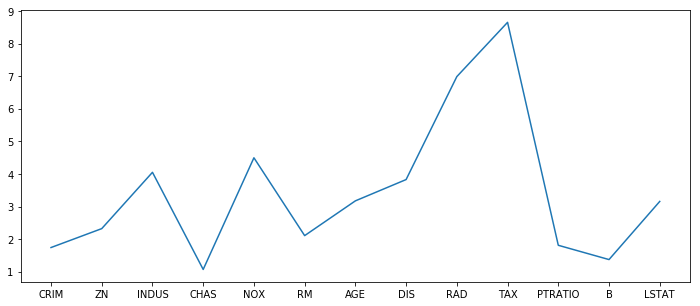

In [23]:
plt.figure(figsize = (12, 5))
plt.plot(xx.columns[1:], VIF)

#### Adding interaction term to account for non-linearity

In [24]:
xx = X[['LSTAT', 'AGE']].copy()
xx2 = pd.DataFrame(xx.LSTAT * X.AGE, columns = ['LSTAT*AGE'])
xx = pd.concat([xx, xx2], axis = 1)
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.MEDV.copy()
results = sm.OLS(yy, xx).fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 30 Jul 2018   Prob (F-statistic):           6.92e-69
Time:                        21:08:23   Log-Likelihood:                -1269.4
No. Observations:                 394   AIC:                             2547.
Df Residuals:                     390   BIC:                             2563.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8154      1.619     22.124      0.000      32.633      38.998
LSTAT         -1.2689      0.179     -7.097      0.000      -1.620      -0.917
AGE           -0.0096      0.022     -0.430      0.667      -0.053       0.034
LSTAT*AGE      0.0034      0.002      1.711      0.088      -0.001       0.007
==============================================================================
Omnibus:                      120.226   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.931
Skew:                           1.550   Prob(JB):                     4.45e-61
Kurtosis:                       5.704   Cond. No.                     6.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""